In [9]:

# %matplotlib inline

In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.animation as animation

from test_functions import f1

from bruteforce.scalar_optimization import Dumb
from zeroth.nelder_mead import NelderMead, EXPAND_CLASSIC, EXPAND_MINIMIZE

In [11]:
G = np.linspace(-10,10,1000)

# Demo

### Automated demo

In [12]:
Ndim = 2 # dimensions

def f1(x, y):
    return x*x + y*y - 5*x + 8*y

def himmelblau(x,y):
    return np.square(x*x + y - 11) + np.square(x + y*y -7)

def ackley(x,y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x*x + y*y))) - np.exp(0.5*(np.cos(2*3.1415*x)+np.cos(2*3.1415*y)))+ np.e + 20

xlims = (-5, 5)
ylims = (-5, 5)

X = np.linspace(*xlims, 100)
Y = np.linspace(*ylims, 100)

nm = NelderMead(eps_f=1e-10, eps_x=1e-10, expand=EXPAND_CLASSIC)
S0 = nm.init_simplex(2, x0=(-1.0,-2.4), simplex_edge=5)
S0

f = ackley

In [13]:


nm.optimize(f, 2, np.array([xlims,ylims]), init_only=True)

[[-1.  -2.4]
 [ 4.  -2.4]
 [-1.   2.6]]


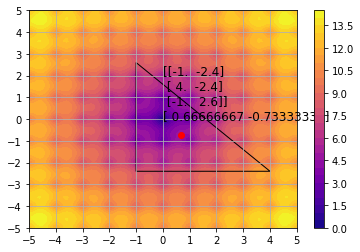

In [32]:
%matplotlib inline
Z = f(*np.meshgrid(X,Y))

fig, ax = plt.subplots()
cf = plt.contourf(X, Y, Z, cmap='plasma', levels=30)
plt.xticks(range(xlims[0], xlims[1]+1))
plt.yticks(range(ylims[0], ylims[1]+1))
fig.colorbar(cf)
ax.grid()

p = Polygon(nm.S, fill=False)
log = ax.text(0, 0, '', fontsize=12)
x_c = nm.S.mean(axis=0)
scat = plt.scatter(0,0, c='r')

def gen():
    global k 
    k = 1
    while not nm._term_condition():
        k += 1
        yield k

def init():
    nm.optimize(f, 2, np.array([xlims, ylims]), init_only=True, S0=S0.copy())
    print(S0)
    p.set_xy(nm.S)
    x_c = nm.S.mean(axis=0)
    log.set_text(str(nm.S) + "\n" + str(x_c))
    ax.add_patch(p)
    scat.set_offsets(x_c)
    return p, log, scat

def animate(i):
    Z = f(*np.meshgrid(X,Y))

    fig, ax = plt.subplots()
    cf = plt.contourf(X, Y, Z, cmap='plasma', levels=30)
    plt.xticks(range(xlims[0], xlims[1]+1))
    plt.yticks(range(ylims[0], ylims[1]+1))
    fig.colorbar(cf)
    ax.grid()

    p = Polygon(nm.S, fill=False)
    log = ax.text(0, 0, '', fontsize=12)
    x_c = nm.S.mean(axis=0)
    scat = plt.scatter(0,0, c='r')
    
    nm._step()
    p.set_xy(nm.S)
    ax.add_patch(p)
    x_c = nm.S.mean(axis=0)
    log.set_text(str(i)+" "+str(nm.S) + "\n" + str(x_c) + "\n" + nm.last_action)
    scat.set_offsets(x_c)
    return p, log, scat

true_x0 = np.array([2.5, -4])


# ax.scatter(*true_x0, c='g')
# plt.scatter(*x_0, c='r')

init()
# for i in range(7):
#     animate(i)

plt.show()

# animate(1)
# animate(2)
# animate(3)
# animate(4)

# ani = animation.FuncAnimation(fig, animate, frames=gen, init_func=init,
#                               interval=250, blit=True)

(<matplotlib.patches.Polygon at 0x26bd73cac10>,
 Text(0, 0, '6 [[ 0.13647461 -0.78195801]\n [-0.95849609  0.24770508]\n [-0.375       0.4125    ]]\n[-0.39900716 -0.04058431]\nexpanded_c'),
 <matplotlib.collections.PathCollection at 0x26bd74ee700>)

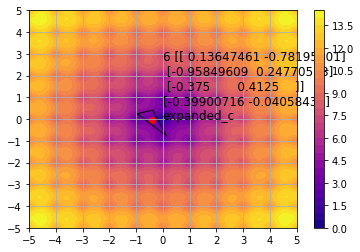

In [40]:
animate(6)

In [16]:
init()

[[-1.  -2.4]
 [ 4.  -2.4]
 [-1.   2.6]]


(<matplotlib.patches.Polygon at 0x26bd377a610>,
 Text(0, 0, '[[-1.  -2.4]\n [ 4.  -2.4]\n [-1.   2.6]]\n[ 0.66666667 -0.73333333]'),
 <matplotlib.collections.PathCollection at 0x26bd4844460>)

[[-1.  -2.4]
 [ 4.  -2.4]
 [-1.   2.6]]


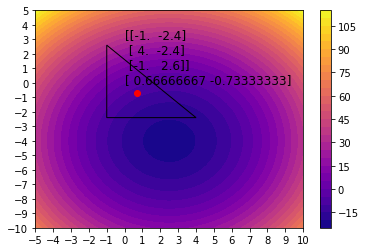

In [50]:
%matplotlib inline


xlims = (-5, 10)
ylims = (-10, 5)

X = np.linspace(*xlims, 100)
Y = np.linspace(*ylims, 100)

Z = f1(*np.meshgrid(X,Y))

fig, ax = plt.subplots()
cf = plt.contourf(X, Y, Z, cmap='plasma', levels=30)
plt.xticks(range(xlims[0], xlims[1]+1))
plt.yticks(range(ylims[0], ylims[1]+1))
fig.colorbar(cf)
# ax.grid()

p = Polygon(nm.S, fill=False)
log = ax.text(0, 0, '', fontsize=12)
x_c = nm.S.mean(axis=0)
scat = plt.scatter(0,0, c='r')

def gen():
    global k 
    k = 1
    while not nm._term_condition():
        k += 1
        yield k

def init():
    nm.optimize(f1, 2, np.array([xlims, ylims]), init_only=True, S0=S0.copy())
    print(S0)
    p.set_xy(nm.S)
    x_c = nm.S.mean(axis=0)
    log.set_text(str(nm.S) + "\n" + str(x_c))
    ax.add_patch(p)
    scat.set_offsets(x_c)
    return p, log, scat

def animate(i):
    fig, ax = plt.subplots()
    cf = plt.contourf(X, Y, Z, cmap='plasma', levels=30)
    plt.xticks(range(xlims[0], xlims[1]+1))
    plt.yticks(range(ylims[0], ylims[1]+1))
    fig.colorbar(cf)
    # ax.grid()

    p = Polygon(nm.S, fill=False)
    log = ax.text(0, 0, '', fontsize=12)
    x_c = nm.S.mean(axis=0)
    scat = plt.scatter(0,0, c='r')
    
    nm._step()
    p.set_xy(nm.S)
    ax.add_patch(p)
    x_c = nm.S.mean(axis=0)
    log.set_text(str(i)+" "+str(nm.S) + "\n" + str(x_c) + "\n" + nm.last_action)
    scat.set_offsets(x_c)
    return p, log, scat

true_x0 = np.array([2.5, -4])


# ax.scatter(*true_x0, c='g')
# plt.scatter(*x_0, c='r')

init()
# for i in range(7):
#     animate(i)

plt.show()

# animate(1)
# animate(2)
# animate(3)
# animate(4)

# ani = animation.FuncAnimation(fig, animate, frames=gen, init_func=init,
#                               interval=250, blit=True)

(<matplotlib.patches.Polygon at 0x26bd92b8760>,
 Text(0, 0, '1 [[ 2.27148438 -3.77207031]\n [ 2.89404297 -3.74399414]\n [ 2.72497559 -4.06534424]]\n[ 2.63016764 -3.86046956]\ncontracted outside'),
 <matplotlib.collections.PathCollection at 0x26bd93a15b0>)

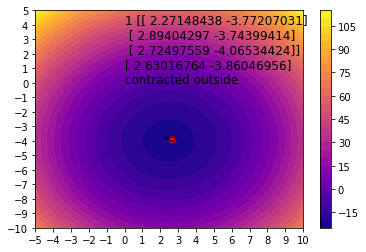

In [58]:
animate(1)